In [1]:
import sys,os
sys.modules["mpi4py"] = None

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import astropy.units as u

from lenstools import dataExtern,ConvergenceMap,ShearMap
from lenstools.simulations.nicaea import Nicaea

/home/alexandre/Desktop/Projects/LensTools/lenstools/utils/mpi.py:15: UserWarning: Could not import mpi4py! (if you set sys.modules['mpi4py']=None please disregard this message)
  warnings.warn(wmsg)


### Show the convergence map with its peaks highlighted 

In [2]:
conv_map = ConvergenceMap.load(os.path.join(dataExtern(),"conv1.fit"))

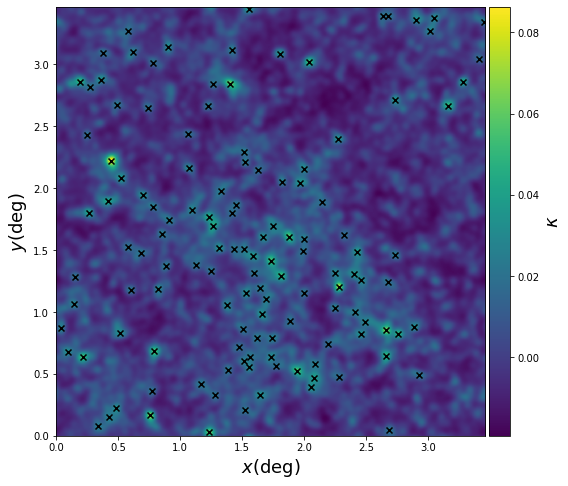

In [4]:
#Plot setup
fig,ax = plt.subplots(figsize=(8,8))
 
#Smooth on 1 arcmin
conv_map.smooth(1.0*u.arcmin,kind="gaussianFFT",inplace=True)

#Find the peak locations and height
sigma_peaks = np.linspace(-2.,11.,101)
height,positions = conv_map.locatePeaks(sigma_peaks,norm=True)

#Show the map and the peaks on it (left panel)
conv_map.visualize(fig=fig,ax=ax,colorbar=True,cbar_label=r"$\kappa$")
ax.scatter(*positions[height>2.].to(u.deg).value.T,color="black",marker="x")
ax.set_xlim(0,conv_map.side_angle.to(u.deg).value)
ax.set_ylim(0,conv_map.side_angle.to(u.deg).value)
fig.tight_layout()

### Show the peak histogram and the PDF of the convergence map

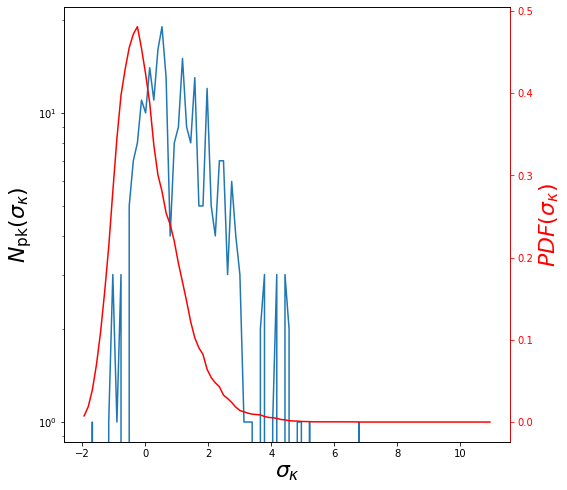

In [7]:
#Plot setup
fig,ax = plt.subplots(figsize=(8,8))

#Smooth on 1 arcmin
conv_map.smooth(1.0*u.arcmin,kind="gaussianFFT",inplace=True)

#Show the peak histogram and the PDF at these convergence values
sigma = np.linspace(-2.,11.,101)

#This method is wrapped around conv.countPeaks(sigma)
conv_map.peakHistogram(sigma,norm=True,fig=fig,ax=ax)
ax_right = ax.twinx()

#This method is wrapped around conv.pdf(sigma)
conv_map.plotPDF(sigma,norm=True,fig=fig,ax=ax_right,color="red")
	
#All PDF quantities are shown in red
ax_right.spines["right"].set_color("red")
ax_right.tick_params(axis="y",colors="red")
ax_right.yaxis.label.set_color("red")

### Plot the E and B modes power spectrum

In [8]:
shear_map = ShearMap.load(os.path.join(dataExtern(),"WLshear_z2.00_0001r.fits"))

ImportError: You need to install the Nicaea bindings to use this routine! Check your GSL/FFTW3 installations!

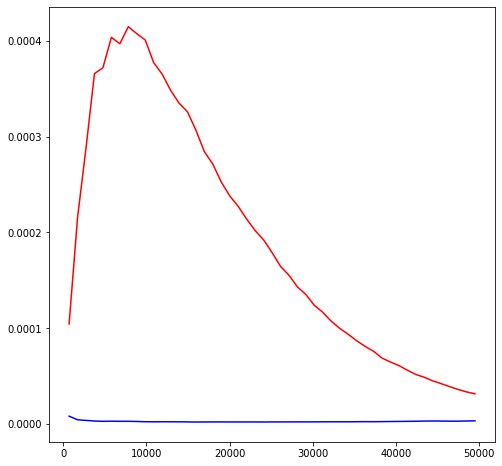

In [9]:
#Plot setup
fig,ax = plt.subplots(figsize=(8,8))

#Load in the shear map, compute E and B modes power spectrum
l_edges = np.linspace(200.,50000.,50)
l,ee,bb,eb = shear_map.eb_power_spectrum(l_edges)

###################################################
#Plot the power spectra and prediction from NICAEA#
###################################################

#Plot measured E and B modes
ax.plot(l,l*(l+1)*ee/(2.*np.pi),label=r"$P^{EE}$",color="red")
ax.plot(l,l*(l+1)*bb/(2.*np.pi),label=r"$P^{BB}$",color="blue")

#Use the python bindings of NICAEA to get the E mode prediction
cosmo = Nicaea(Om0=0.26,Ode0=0.74,w0=-1,sigma8=0.8)
ax.plot(l,l*(l+1)*cosmo.convergencePowerSpectrum(l,z=2.0)/(2.*np.pi),label=r"$P^{\kappa\kappa}{\rm (NICAEA)}$",linestyle="--",color="red")

#Labels
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$\ell$",fontsize=22)
ax.set_ylabel(r"$\ell(\ell+1)P_\ell/2\pi$",fontsize=22)
ax.legend(loc="upper left")